In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def union(r1,r2,big) :
  if r2 != r1 :
    if ptr[r1] > ptr[r2] :
      ptr[r2] += ptr[r1]
      ptr[r1] = r2
      r1 = r2
    else :
      ptr[r1] += ptr[r2]
      ptr[r2] = r1
    if -ptr[r1] > big :
      big = -ptr[r1]
  return r1, r2, big

In [3]:
def find(i) :
  if ptr[i] < 0 :
    return i
  else :
    ptr[i] = find(ptr[i])
    return ptr[i]

In [4]:
L = 256
N = L**2

In [5]:
bonds = []
for i in range(L):
    for j in range(L):
        index = i * L + j
        if j < L - 1:  # 오른쪽 연결
            bonds.append((index, index + 1))
        if i < L - 1:  # 아래 연결
            bonds.append((index, index + L))

np.random.shuffle(bonds)

In [6]:
ptr = np.full(N, -1)
big = 0
big_values = []

for bond in bonds:
    s1, s2 = bond
    r1 = find(s1)
    r2 = find(s2)
    if r1 != r2:
        r1, r2, big = union(r1, r2, big)
    big_values.append(big/N)

x_values = np.arange(len(bonds)) / len(bonds)
y_values = big_values

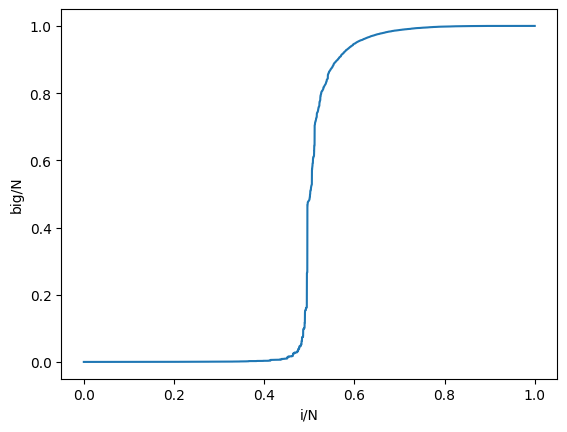

In [7]:
plt.plot(x_values, y_values)
plt.xlabel('i/N')
plt.ylabel('big/N')
plt.show()

In [8]:
def percolation(L):
    N = L**2

    bonds = []
    for i in range(L):
        for j in range(L):
            index = i * L + j
            if j < L - 1:  # 오른쪽 연결
                bonds.append((index, index + 1))
            if i < L - 1:  # 아래 연결
                bonds.append((index, index + L))

    np.random.shuffle(bonds)

    global ptr
    ptr = np.full(N, -1)
    big = 0
    big_values = []

    for bond in bonds:
        s1, s2 = bond
        r1 = find(s1)
        r2 = find(s2)
        if r1 != r2:
            r1, r2, big = union(r1, r2, big)
        big_values.append(big / N)

    x_values = np.arange(len(bonds)) / len(bonds)
    y_values = big_values

    return x_values, y_values

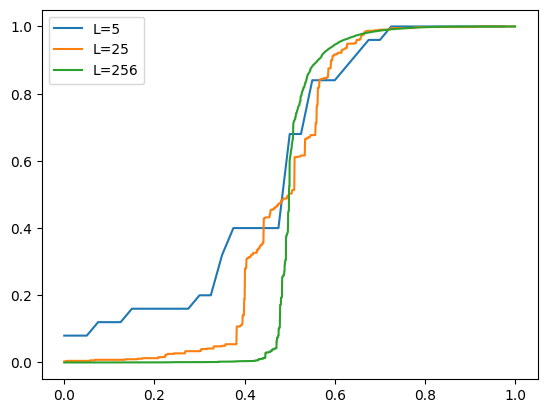

In [9]:
L5 = percolation(5)
L25 = percolation(25)
L256 = percolation(256)

plt.plot(L5[0],L5[1],label='L=5')
plt.plot(L25[0],L25[1],label='L=25')
plt.plot(L256[0],L256[1],label='L=256')
plt.legend()
plt.show()